<a href="https://colab.research.google.com/github/MylesHurley/Final_Assignment/blob/main/Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Regression

<a target="_blank" href="https://colab.research.google.com/github/mayankbakshi/EE443-543/blob/main/Linear-Regression.ipynb?authuser=5">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Importing packages
We import our standard libraries at this top
level.

In [3]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots


### New imports
Throughout this lab we will introduce new functions and libraries. However,
we will import them here to emphasize these are the new
code objects in this lab. Keeping imports near the top
of a notebook makes the code more readable, since scanning the first few
lines tells us what libraries are used.

In [2]:
import statsmodels.api as sm


 We will provide relevant details about the
functions below as they are needed.

Besides importing whole modules, it is also possible
to import only a few items from a given module. This
will help keep the  *namespace* clean.
We will use a few specific objects from the `statsmodels` package
which we import here.

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.2/828.2 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=7285361863b32090ded6ebf059f748f7f91697d43bd1071572d72c9084911aa1
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [4]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm


As one of the import statements above is quite a long line, we inserted a line break `\` to
ease readability.

We will also use some functions written for the labs in this book in the `ISLP`
package.

In [5]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


### Inspecting Objects and Namespaces
The
function  `dir()`
provides a list of
objects in a namespace.

In [ ]:
dir()


['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '_2',
 '__',
 '__DW_SCOPE__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

 This shows you everything that `Python` can find at the top level.
There are certain objects like `__builtins__` that contain references to built-in
functions like `print()`.

Every python object has its own notion of
namespace, also accessible with `dir()`. This will include
both the attributes of the object
as well as any methods associated with it. For instance, we see `'sum'` in the listing for an
array.

In [ ]:
A = np.array([3,5,11])
dir(A)


['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

 This indicates that the object `A.sum` exists. In this case it is a method
that can be used to compute the sum of the array `A` as can be seen by typing `A.sum?`.

In [ ]:
A.sum()


19

## Simple Linear Regression
In this section we will  construct model
matrices (also called design matrices) using the `ModelSpec()`  transform from `ISLP.models`.

We  will use the `Boston` housing data set, which is contained in the `ISLP` package.  The `Boston` dataset records  `medv`  (median house value) for $506$ neighborhoods
around Boston.  We will build a regression model to predict  `medv`  using $13$
predictors such as  `rmvar`  (average number of rooms per house),
 `age`  (proportion of owner-occupied units built prior to 1940), and  `lstat`  (percent of
households with low socioeconomic status).  We will use `statsmodels` for this
task, a `Python` package that implements several commonly used
regression methods.

We have included a simple loading function `load_data()` in the
`ISLP` package:

In [6]:
Boston = load_data("Boston")
Boston.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

Type `Boston?` to find out more about these data.

We start by using the `sm.OLS()`  function to fit a
simple linear regression model.  Our response will be
 `medv`  and  `lstat`  will be the single predictor.
For this model, we can create the model matrix by hand.


In [ ]:
Boston?

# Go to https://islp.readthedocs.io/en/latest/datasets/Boston.html to look deeper into the dataset

In [7]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


# *EXERCISE: Create and display a scatter plot depicting the relation betweeen 'medv' and 'lstat' in the Boston dataset*

In [11]:
from os import lstat
plot:( medv,lstat)


NameError: name 'medv' is not defined

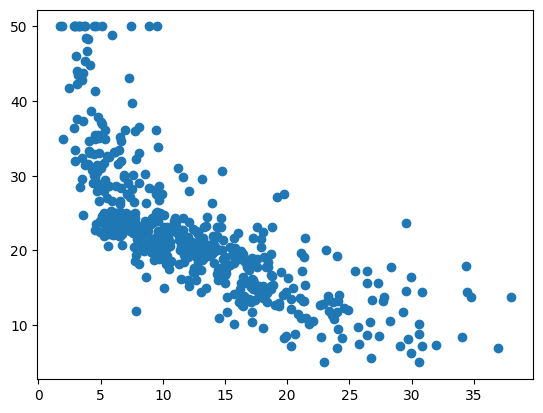

In [12]:
    import matplotlib.pyplot as plt
x = Boston['lstat']
y = Boston['medv']
plt.scatter(x,y)
plt.show()


In [10]:
    import matplotlib.pyplot as plt


# *EXERCISE: Create and display a scatter plot depicting the relation betweeen 'medv' and one other feature in the Boston dataset*

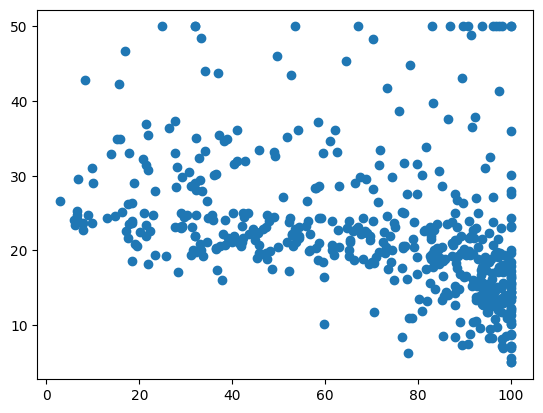

In [14]:
    import matplotlib.pyplot as plt
x = Boston['age']
y = Boston['medv']
plt.scatter(x,y)
plt.show()

In [ ]:
#Insert exercise solution here



We extract the response, and fit the model.

In [15]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()


Note that `sm.OLS()` does
not fit the model; it specifies the model, and then `model.fit()` does the actual fitting.  

Our `ISLP` function `summarize()` produces a simple table of the parameter estimates,
their standard errors, t-statistics and p-values.
The function takes a single argument, such as the object `results`
returned here by the `fit`
method, and returns such a summary.

In [16]:
summarize(results)


,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


Before we describe other methods for working with fitted models, we outline a more useful and general framework for constructing a model matrix~`X`.
### Using Transformations: Fit and Transform
Our model above has a single predictor, and constructing `X` was straightforward.
In practice  we often fit models with more than one predictor, typically selected from an array or data frame.
We may wish to introduce transformations to the variables before fitting the model, specify interactions between variables, and expand some particular variables into sets of variables (e.g. polynomials).
The `sklearn`  package has a particular notion
for this type of task: a *transform*. A transform is an object
that is created with some parameters as arguments. The
object has two main methods: `fit()` and `transform()`.

We provide a general approach for specifying models and constructing
the model matrix through the transform `ModelSpec()` in the `ISLP` library.
`ModelSpec()`
(renamed `MS()` in the preamble) creates a
transform object, and then a pair of methods
`transform()` and `fit()` are used to construct a
corresponding model matrix.

We first describe this process for our simple regression model  using a single predictor `lstat` in
the `Boston` data frame, but will use it repeatedly in more
complex tasks in this and other labs in this book.
In our case the transform is created by the expression
`design = MS(['lstat'])`.

The `fit()`  method takes the original array and may do some
initial computations on it, as specified in the transform object.
For example, it may compute means and standard deviations for centering and scaling.
The `transform()`
method applies the fitted transformation to the array of data, and produces the model matrix.


In [17]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In this simple case, the `fit()`  method does very little; it simply checks that the variable `'lstat'` specified in `design` exists in `Boston`. Then `transform()` constructs the model matrix with two columns: an `intercept` and the variable `lstat`.

These two operations can be  combined with the
`fit_transform()`  method.

In [18]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Note that, as in the previous code chunk when the two steps were done separately, the `design` object is changed as a result of the `fit()` operation. The power of this pipeline will become clearer when we fit more complex models that involve interactions and transformations.

Let's return to our fitted regression model.
The object
`results` has several methods that can be used for inference.
We already presented a function `summarize()` for showing the essentials of the fit.
For a full and somewhat exhaustive summary of the fit, we can use the `summary()`
method.

In [19]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           5.08e-88
Time:                        02:25:07   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted coefficients can also be retrieved as the
`params` attribute of `results`.

In [20]:
results.params


,0
intercept,34.553841
lstat,-0.950049


The `get_prediction()`  method can be used to obtain predictions, and produce confidence intervals and
prediction intervals for the prediction of  `medv`  for  given values of  `lstat`.

We first create a new data frame, in this case containing only the variable `lstat`, with the values for this variable at which we wish to make predictions.
We then use the `transform()` method of `design` to create the corresponding model matrix.

In [21]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX


,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


Next we compute the predictions at `newX`, and view them by extracting the `predicted_mean` attribute.

In [22]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean


array([29.80359411, 25.05334734, 20.30310057])

We can produce confidence intervals for the predicted values.

In [23]:
new_predictions.conf_int(alpha=0.05)


array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

Prediction intervals are computing by setting `obs=True`:

In [24]:
new_predictions.conf_int(obs=True, alpha=0.05)


array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

 For instance, the 95% confidence interval associated with an
 `lstat`  value of 10 is (24.47, 25.63), and the 95% prediction
interval is (12.82, 37.28).  As expected, the confidence and
prediction intervals are centered around the same point (a predicted
value of 25.05 for  `medv`  when  `lstat`  equals
10), but the latter are substantially wider.

Next we will plot  `medv`  and  `lstat`
using `DataFrame.plot.scatter()`, \definelongblankMR{plot.scatter()}{plot.slashslashscatter()}
and wish to
add the regression line to the resulting plot.

### Defining Functions
While there is a function
within the `ISLP` package that adds a line to an existing plot, we take this opportunity
to define our first function to do so.

In [25]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)


 A few things are illustrated above. First we see the syntax for defining a function:
`def funcname(...)`. The function has arguments `ax, b, m`
where `ax` is an axis object for an exisiting plot, `b` is the intercept and
`m` is the slope of the desired line. Other plotting  options can be passed on to
`ax.plot` by including additional optional arguments as follows:

In [26]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


The addition of `*args` allows any number of
non-named arguments to `abline`, while `*kwargs` allows any
number of named arguments (such as `linewidth=3`) to `abline`.
In our function, we pass
these arguments verbatim to `ax.plot` above. Readers
interested in learning more about
functions are referred to the section on
defining functions in [docs.python.org/tutorial](https://docs.python.org/3/tutorial/controlflow.html#defining-functions).

Let’s use our new function to add this regression line to a plot of
`medv` vs. `lstat`.

/tmp/ipython-input-1591428221.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipython-input-1591428221.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


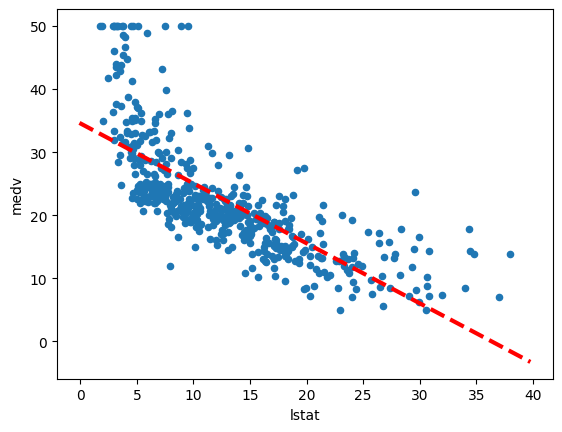

In [27]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)


Thus, the final call to `ax.plot()` is `ax.plot(xlim, ylim, 'r--', linewidth=3)`.
We have used the argument `'r--'` to produce a red dashed line, and added
an argument to make it of width 3.
There is some evidence for non-linearity in the relationship between  `lstat`  and  `medv`. We will explore this issue later in this lab.

As mentioned above, there is an existing function to add a line to a plot --- `ax.axline()` --- but knowing how to write such functions empowers us to create more expressive displays.



Next we examine some diagnostic plots, several of which were discussed
in Section~\ref{Ch3:problems.sec}.
We can find the fitted values and residuals
of the fit as attributes of the `results` object.
Various influence measures describing the regression model
are computed with the `get_influence()` method.
As we will not use the `fig` component returned
as the first value from `subplots()`, we simply
capture the second returned value in `ax` below.

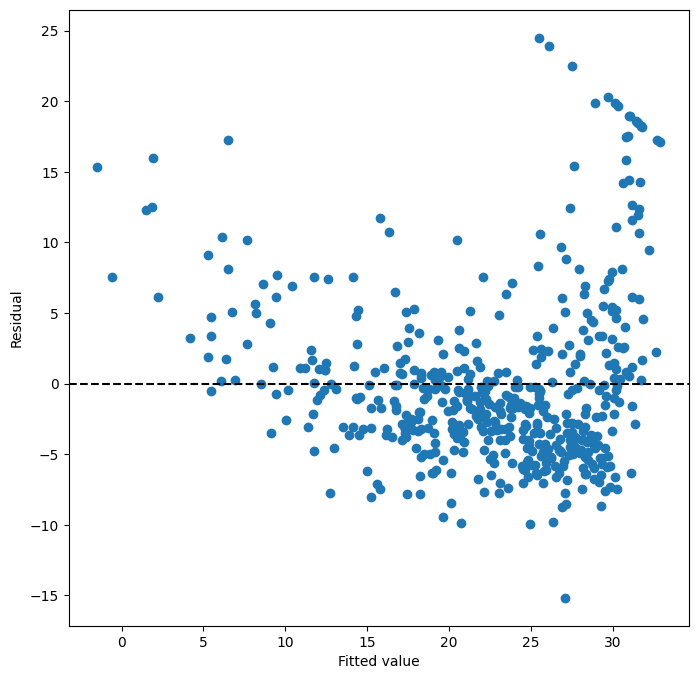

In [28]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


 We add a horizontal line at 0 for reference using the
 `ax.axhline()`   method, indicating
it should be black (`c='k'`) and have a dashed linestyle (`ls='--'`).

On the basis of the residual plot, there is some evidence of non-linearity.
Leverage statistics can be computed for any number of predictors using the
`hat_matrix_diag` attribute of the value returned by the
`get_influence()`  method.

In [ ]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


 The `np.argmax()`  function identifies the index of the largest element of an array, optionally computed over an axis of the array.
In this case, we maximized over the entire array
to determine which observation has the largest leverage statistic.

## Multiple Linear Regression
In order to fit a multiple linear regression model using least squares, we again use
the `ModelSpec()`  transform to construct the required
model matrix and response. The arguments
to `ModelSpec()` can be quite general, but in this case
a list of column names suffice. We consider a fit here with
the two variables `lstat` and `age`.

In [ ]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

Notice how we have compacted the first line into a succinct expression describing the construction of `X`.

The  `Boston`   data set contains 12 variables, and so it would be cumbersome
to have to type all of these in order to perform a regression using all of the predictors.
Instead, we can use the following short-hand:\definelongblankMR{columns.drop()}{columns.slashslashdrop()}

In [ ]:
terms = Boston.columns.drop('medv')
terms


We can now fit the model with all the variables in `terms` using
the same model matrix builder.

In [ ]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)


What if we would like to perform a regression using all of the variables but one?  For
example, in the above regression output,   `age`  has a high $p$-value.
So we may wish to run a regression excluding this predictor.
The following syntax results in a regression using all predictors except  `age`.

In [ ]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())


## Multivariate Goodness of Fit
We can access the individual components of `results` by name
(`dir(results)` shows us what is available). Hence
`results.rsquared` gives us the $R^2$,
and
`np.sqrt(results.scale)` gives us the RSE.

Variance inflation factors (section~\ref{Ch3:problems.sec}) are sometimes useful
to assess the effect of collinearity in the model matrix of a regression model.
We will compute the VIFs in our multiple regression fit, and use the opportunity to introduce the idea of *list comprehension*.

### List Comprehension
Often we encounter a sequence of objects which we would like to transform
for some other task. Below, we compute the VIF for each
feature in our `X` matrix and produce a data frame
whose index agrees with the columns of `X`.
The notion of list comprehension can often make such
a task easier.

List comprehensions are simple and powerful ways to form
lists of `Python` objects. The language also supports
dictionary and *generator* comprehension, though these are
beyond our scope here. Let's look at an example. We compute the VIF for each of the variables
in the model matrix `X`, using the function `variance_inflation_factor()`.


In [ ]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif


The function `VIF()` takes two arguments: a dataframe or array,
and a variable column index. In the code above we call `VIF()` on the fly for all columns in `X`.  
We have excluded column 0 above (the intercept), which is not of interest. In this case the VIFs are not that exciting.

The object `vals` above could have been constructed with the following for loop:

In [ ]:
vals = []
for i in range(1, X.values.shape[1]):
    vals.append(VIF(X.values, i))


List comprehension allows us to perform such repetitive operations in a more straightforward way.
## Interaction Terms
It is easy to include interaction terms in a linear model using `ModelSpec()`.
Including a tuple `("lstat","age")` tells the model
matrix builder to include an interaction term between
 `lstat`  and  `age`.

In [ ]:
X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())


## Non-linear Transformations of the Predictors
The model matrix builder can include terms beyond
just column names and interactions. For instance,
the `poly()` function supplied in `ISLP` specifies that
columns representing polynomial functions
of its first argument are added to the model matrix.

In [ ]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)


The effectively zero *p*-value associated with the quadratic term
(i.e. the third row above) suggests that it leads to an improved model.

By default, `poly()` creates a basis matrix for inclusion in the
model matrix whose
columns are *orthogonal polynomials*, which are designed for stable
least squares computations. {Actually, `poly()` is a  wrapper for the workhorse and standalone  function `Poly()` that does the  work in building the model matrix.}
Alternatively, had we included an argument
`raw=True` in the above call to `poly()`, the basis matrix would consist simply of
`lstat` and `lstat**2`. Since either of these bases
represent quadratic polynomials, the fitted values  would not
change in this case, just the polynomial coefficients.  Also by default, the columns
created by `poly()` do not include an intercept column as
that is automatically added by `MS()`.

We use the `anova_lm()` function to further quantify the extent to which the quadratic fit is
superior to the linear fit.

In [ ]:
anova_lm(results1, results3)


Here `results1` represents the linear submodel containing
predictors `lstat` and `age`,
while `results3` corresponds to the larger model above  with a quadratic
term in `lstat`.
The `anova_lm()` function performs a hypothesis test
comparing the two models. The null hypothesis is that the quadratic
term in the bigger model is not needed, and the alternative hypothesis is that the
bigger model is superior. Here the *F*-statistic is 177.28 and
the associated *p*-value is zero.
In this case the *F*-statistic is the square of the
*t*-statistic for the quadratic term in the linear model summary
for `results3` --- a consequence of the fact that these nested
models differ by one degree of freedom.
This provides very clear evidence that the quadratic polynomial in
`lstat` improves the linear model.
This is not surprising, since earlier we saw evidence for non-linearity in the relationship between `medv`
and  `lstat`.

The function `anova_lm()` can take more than two nested models
as input, in which case it compares every successive pair of models.
That also explains why their are `NaN`s in the first row above, since
there is no previous model with which to compare the first.


In [ ]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


We see that when the quadratic term is included in the model,
there is little discernible pattern in the residuals.
In order to create a cubic or higher-degree polynomial fit, we can simply change the degree argument
to `poly()`.


## Qualitative Predictors
Here we use the  `Carseats`  data, which is included in the
`ISLP` package. We will  attempt to predict `Sales`
(child car seat sales) in 400 locations based on a number of
predictors.

In [ ]:
Carseats = load_data('Carseats')
Carseats.columns


The `Carseats`  
 data includes qualitative predictors such as
 `ShelveLoc`, an indicator of the quality of the shelving
 location --- that is,
the  space within a store in which the car seat is displayed. The predictor
 `ShelveLoc`  takes on three possible values, `Bad`, `Medium`, and `Good`.
Given a qualitative variable such as  `ShelveLoc`, `ModelSpec()` generates dummy
variables automatically.
These variables are often referred to as a *one-hot encoding* of the categorical
feature. Their columns sum to one, so to avoid collinearity with an intercept, the first column is dropped. Below we see
the column `ShelveLoc[Bad]` has been dropped, since `Bad` is the first level of `ShelveLoc`.
Below we fit a multiple regression model that includes some interaction terms.

In [ ]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())


In the first line above, we made `allvars` a list, so that we
could add the interaction terms two lines down.
Our model-matrix builder has created a `ShelveLoc[Good]`
dummy variable that takes on a value of 1 if the
shelving location is good, and 0 otherwise. It has also created a `ShelveLoc[Medium]`
dummy variable that equals 1 if the shelving location is medium, and 0 otherwise.
A bad shelving location corresponds to a zero for each of the two dummy variables.
The fact that the coefficient for `ShelveLoc[Good]` in the regression output is
positive indicates that a good shelving location is associated with high sales (relative to a bad location).
And `ShelveLoc[Medium]` has a smaller positive coefficient,
indicating that a medium shelving location leads to higher sales than a bad
shelving location, but lower sales than a good shelving location.

